# **Ensemble Learning**

 **OVERVIEW PROYEK**

**Tujuan:** Membangun model prediktif untuk mengidentifikasi nasabah yang berpotensi berlangganan deposito berjangka melalui kampanye telemarketing.

**Dataset:** `Bank Marketing dari UCI Repository (45,211 records, 16 features)`

**Problem Type:** Binary Classification (yes/no subscription)

## **1. IMPORT LIBRARY UTAMA**

**Tujuan:**
Mempersiapkan environment dengan mengimport semua library yang diperlukan untuk analisis lengkap.

**Penjelasan:**
- `pandas` & `numpy`: Untuk manipulasi dan analisis data
- `matplotlib` & `seaborn`: Untuk visualisasi data
- `scikit-learn`: Machine learning algorithms dan preprocessing
- `imbalanced-learn`: Untuk handling data tidak seimbang (SMOTE)
- `UCI ML Repo`: Untuk mengambil dataset bank marketing

**Keterangan:**
Library diorganisir berdasarkan fungsinya untuk memudahkan maintenance dan debugging.

In [ ]:
# Import library utama untuk data manipulation dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### **MEMUAT DAN MEMAHAMI DATASET BANK MARKETING**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

## **LOAD DATASET DAN EKSPLORASI AWAL**

In [ ]:
print("\n LOAD DATASET DAN EKSPLORASI AWAL")
print("=" * 50)

# Fetch dataset dari UCI Repository
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets

print(" INFORMASI DATASET:")
print(f"• Jumlah sampel: {X.shape[0]:,}")
print(f"• Jumlah fitur: {X.shape[1]}")
print(f"• Target variable: {y.columns[0]}")

# Membersihkan dan menganalisis target
y_clean = y.iloc[:, 0].str.strip().str.lower()
target_counts = y_clean.value_counts()

print(f"\n DISTRIBUSI KELAS TARGET:")
for kelas, jumlah in target_counts.items():
    persentase = (jumlah / len(y_clean)) * 100
    print(f"• {kelas}: {jumlah:,} samples ({persentase:.1f}%)")

rasio_ketidakseimbangan = target_counts['no'] / target_counts['yes']
print(f"Rasio ketidakseimbangan: {rasio_ketidakseimbangan:.1f}:1")


 LOAD DATASET DAN EKSPLORASI AWAL
 INFORMASI DATASET:
• Jumlah sampel: 45,211
• Jumlah fitur: 16
• Target variable: y

 DISTRIBUSI KELAS TARGET:
• no: 39,922 samples (88.3%)
• yes: 5,289 samples (11.7%)
Rasio ketidakseimbangan: 7.5:1


## **VISUALISASI DISTRIBUSI DATA**


**Tujuan:**
Membuat visualisasi komprehensif untuk memahami distribusi data secara visual.

**Visualisasi yang Dihasilkan:**
1. **Pie Chart**: Proporsi setiap kelas dalam bentuk persentase
2. **Bar Chart**: Jumlah absolut samples per kelas
3. **Imbalance Ratio**: Visualisasi rasio ketidakseimbangan
4. **Info Panel**: Summary statistik dataset

**Manfaat:**
- Memudahkan pemahaman masalah imbalance
- Memberikan context untuk stakeholder non-teknis
- Membantu dalam decision making untuk teknik handling yang tepat

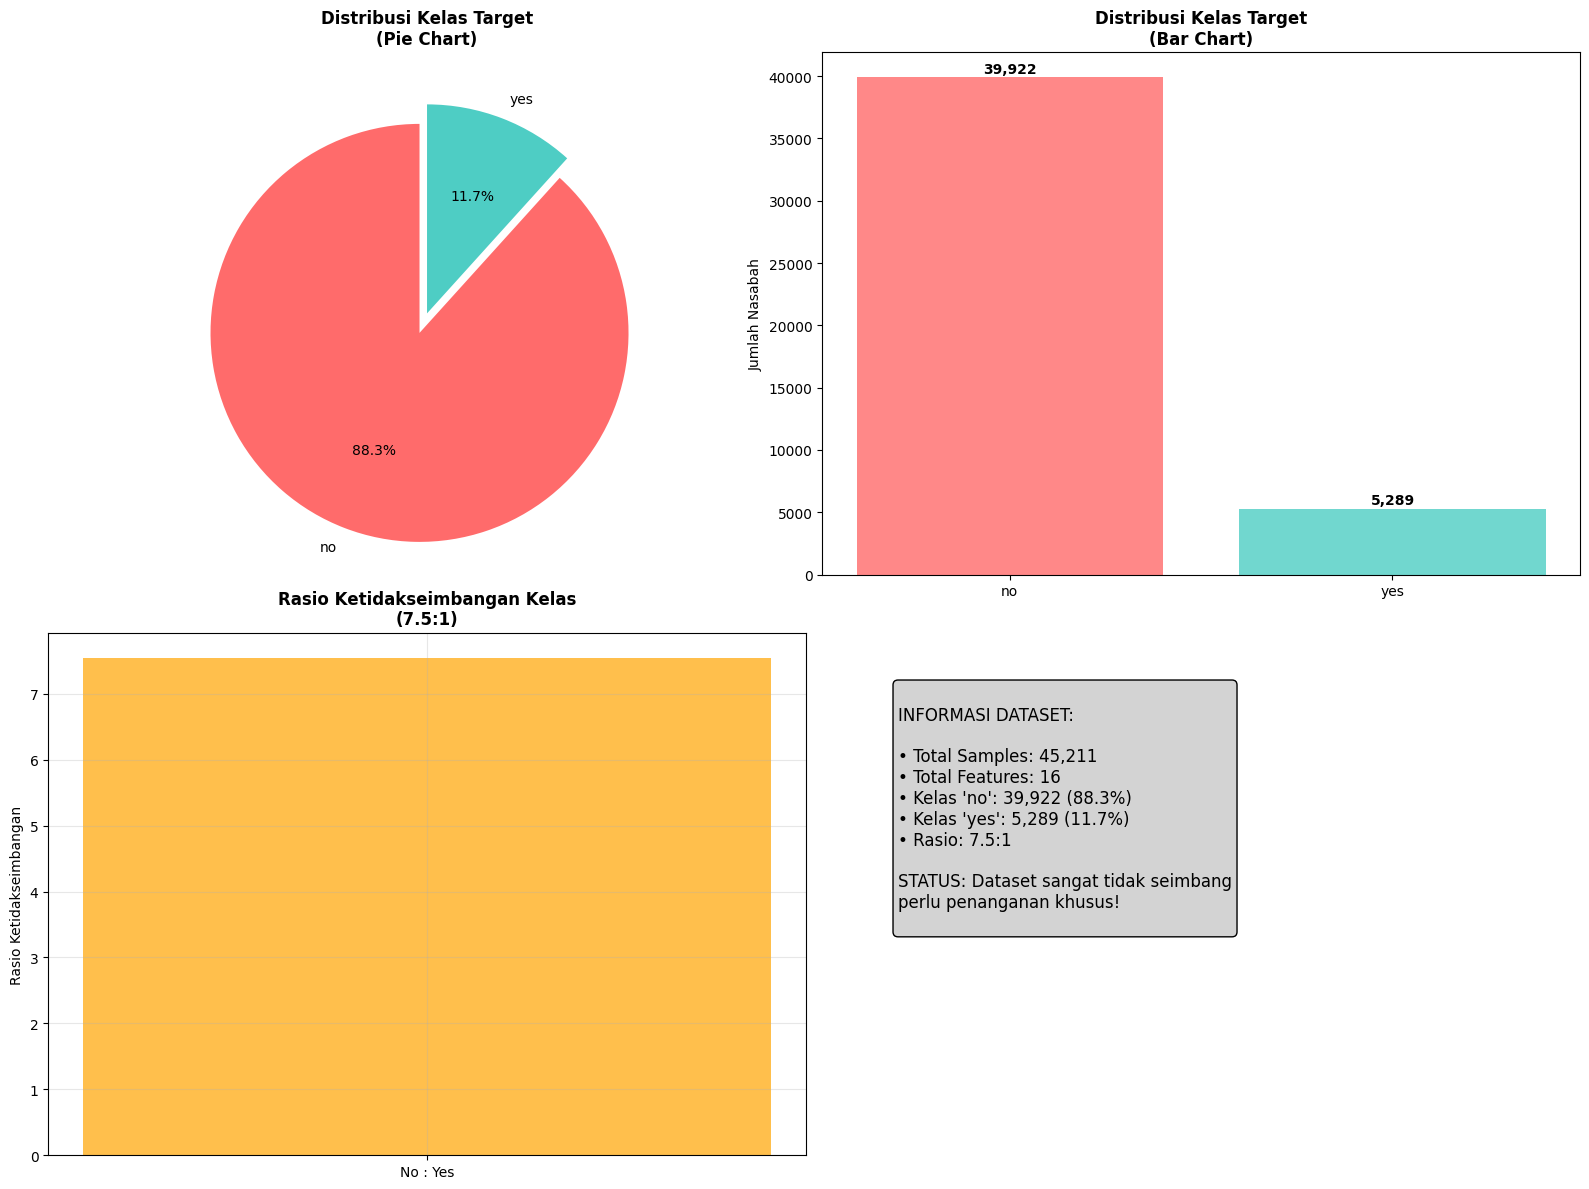

 Visualisasi distribusi data selesai!


In [ ]:

# Visualisasi komprehensif distribusi data
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Pie Chart Distribusi Kelas
axes[0,0].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
               colors=['#FF6B6B', '#4ECDC4'], startangle=90, explode=(0.1, 0))
axes[0,0].set_title('Distribusi Kelas Target\n(Pie Chart)', fontweight='bold')

# 2. Bar Chart Distribusi Kelas
bars = axes[0,1].bar(target_counts.index, target_counts.values,
                     color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
axes[0,1].set_title('Distribusi Kelas Target\n(Bar Chart)', fontweight='bold')
axes[0,1].set_ylabel('Jumlah Nasabah')
for bar in bars:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 100,
                   f'{height:,}', ha='center', va='bottom', fontweight='bold')

# 3. Rasio Ketidakseimbangan
axes[1,0].bar(['No : Yes'], [rasio_ketidakseimbangan], color='orange', alpha=0.7)
axes[1,0].set_ylabel('Rasio Ketidakseimbangan')
axes[1,0].set_title(f'Rasio Ketidakseimbangan Kelas\n({rasio_ketidakseimbangan:.1f}:1)', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 4. Informasi Dataset
axes[1,1].axis('off')
info_text = f"""
INFORMASI DATASET:

• Total Samples: {X.shape[0]:,}
• Total Features: {X.shape[1]}
• Kelas 'no': {target_counts['no']:,} ({target_counts['no']/len(y_clean)*100:.1f}%)
• Kelas 'yes': {target_counts['yes']:,} ({target_counts['yes']/len(y_clean)*100:.1f}%)
• Rasio: {rasio_ketidakseimbangan:.1f}:1

STATUS: Dataset sangat tidak seimbang
perlu penanganan khusus!
"""
axes[1,1].text(0.1, 0.9, info_text, fontsize=12, verticalalignment='top',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

plt.tight_layout()
plt.show()

print(" Visualisasi distribusi data selesai!")

## **PREPROCESSING DATA**

Mempersiapkan data mentah menjadi format yang siap untuk machine learning.

**Langkah-langkah Preprocessing:**
1. **Data Cleaning**: Membersihkan inconsistent values pada target variable
2. **Categorical Encoding**: Mengubah variabel kategorikal menjadi numerik
3. **Train-Test Split**: Membagi data dengan stratifikasi untuk menjaga distribusi
4. **Data Validation**: Memastikan tidak ada missing values

**Best Practices yang Diterapkan:**
- Stratified splitting untuk menjaga distribusi kelas
- Label encoding untuk categorical features
- Random state untuk reproducibility

In [ ]:
print("\n PREPROCESSING DATA")
print("=" * 50)

def prepare_data(X, y):
    """
    Fungsi untuk preprocessing data:
    - Cleaning target variable
    - Encoding categorical features
    - Handling missing values
    """
    # Cleaning target variable
    y_clean = y.iloc[:, 0].str.strip().str.lower()

    # Copy features
    X_clean = X.copy()

    # Encoding categorical variables
    categorical_columns = X_clean.select_dtypes(include=['object']).columns
    label_encoders = {}

    print(" ENCODING VARIABEL KATEGORIKAL:")
    for col in categorical_columns:
        le = LabelEncoder()
        X_clean[col] = le.fit_transform(X_clean[col].astype(str))
        label_encoders[col] = le
        print(f"    {col}: {len(le.classes_)} categories")

    # Encoding target variable
    le_target = LabelEncoder()
    y_encoded = le_target.fit_transform(y_clean)

    return X_clean, y_encoded, le_target, label_encoders

# Preprocessing data
X_processed, y_encoded, target_encoder, feature_encoders = prepare_data(X, y)

print(f"\n HASIL PREPROCESSING:")
print(f"• Shape X: {X_processed.shape}")
print(f"• Shape y: {y_encoded.shape}")
print(f"• Kelas target: {target_encoder.classes_}")

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)

print(f"\n PEMBAGIAN DATA:")
print(f"• Training set: {X_train.shape[0]:,} samples")
print(f"• Testing set: {X_test.shape[0]:,} samples")
print(f"• Features: {X_train.shape[1]}")

print(" Preprocessing data selesai!")


 PREPROCESSING DATA
 ENCODING VARIABEL KATEGORIKAL:
    job: 12 categories
    marital: 3 categories
    education: 4 categories
    default: 2 categories
    housing: 2 categories
    loan: 2 categories
    contact: 3 categories
    month: 12 categories
    poutcome: 4 categories

 HASIL PREPROCESSING:
• Shape X: (45211, 16)
• Shape y: (45211,)
• Kelas target: ['no' 'yes']

 PEMBAGIAN DATA:
• Training set: 31,647 samples
• Testing set: 13,564 samples
• Features: 16
 Preprocessing data selesai!


## **HANDLING IMBALANCED DATA DENGAN SMOTE**

Mengatasi masalah ketidakseimbangan data menggunakan teknik SMOTE.

**Cara Kerja SMOTE:**
1. **Synthetic Sample Generation**: Membuat samples sintetis untuk kelas minoritas
2. **K-NN Based**: Menggunakan tetangga terdekat untuk generate samples
3. **Feature Space Interpolation**: Interpolasi antara samples existing

**Keunggulan SMOTE:**
- Tidak kehilangan informasi seperti undersampling
- Membuat pattern yang realistic
- Meningkatkan model performance untuk kelas minoritas

**Hasil yang Diharapkan:**
- Distribusi kelas menjadi seimbang
- Model belajar pattern kedua kelas dengan baik


HANDLING IMBALANCED DATA DENGAN SMOTE
 ANALISIS SEBELUM SMOTE:
   • no: 27,945 samples (88.3%)
   • yes: 3,702 samples (11.7%)

 MENERAPKAN SMOTE...
 HASIL SETELAH SMOTE:
   • no: 27,945 samples (50.0%)
   • yes: 27,945 samples (50.0%)


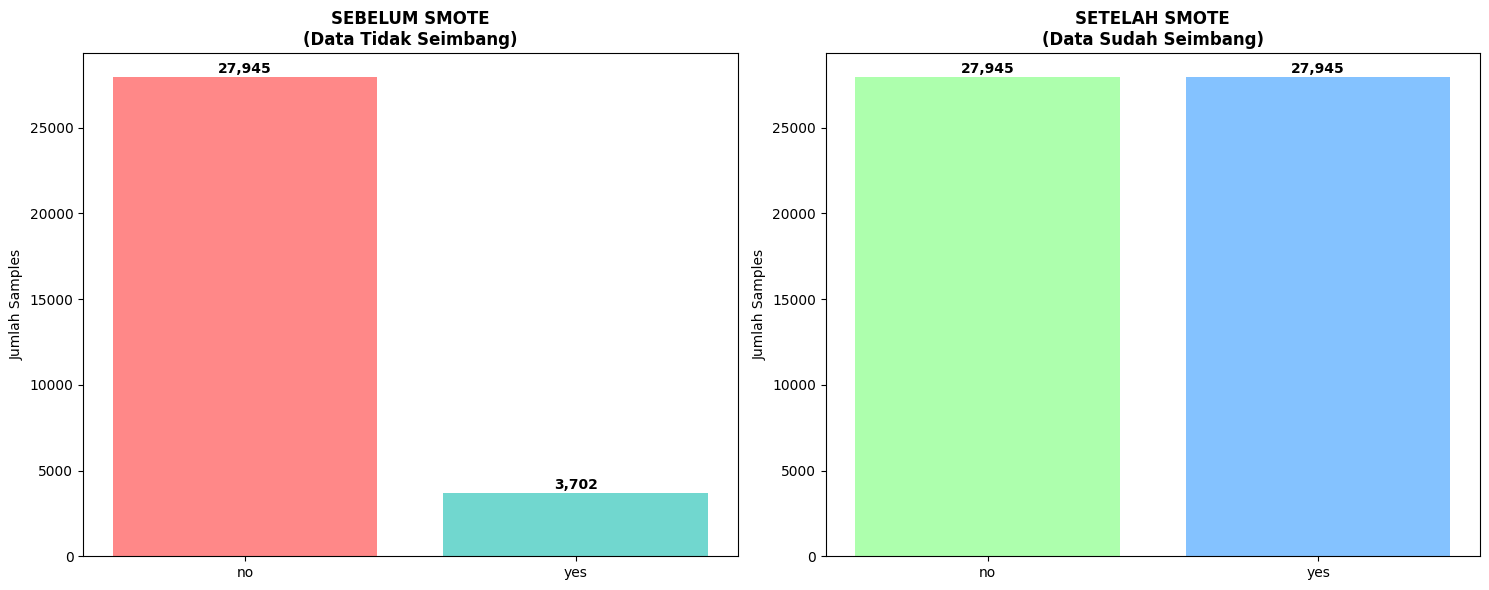

 SMOTE berhasil menyeimbangkan data!
   • Total samples sebelum: 31,647
   • Total samples sesudah: 55,890
   • Penambahan samples: 24,243 samples sintetis


In [ ]:
print("\nHANDLING IMBALANCED DATA DENGAN SMOTE")
print("=" * 50)

print(" ANALISIS SEBELUM SMOTE:")
unique_before, counts_before = np.unique(y_train, return_counts=True)
for cls, count in zip(unique_before, counts_before):
    class_name = target_encoder.inverse_transform([cls])[0]
    percentage = (count / len(y_train)) * 100
    print(f"   • {class_name}: {count:,} samples ({percentage:.1f}%)")

# Menerapkan SMOTE
print("\n MENERAPKAN SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(" HASIL SETELAH SMOTE:")
unique_after, counts_after = np.unique(y_train_smote, return_counts=True)
for cls, count in zip(unique_after, counts_after):
    class_name = target_encoder.inverse_transform([cls])[0]
    percentage = (count / len(y_train_smote)) * 100
    print(f"   • {class_name}: {count:,} samples ({percentage:.1f}%)")

# Visualisasi sebelum dan setelah SMOTE
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Sebelum SMOTE
bars_before = axes[0].bar(['no', 'yes'], counts_before, color=['#FF6B6B', '#4ECDC4'], alpha=0.8)
axes[0].set_title('SEBELUM SMOTE\n(Data Tidak Seimbang)', fontweight='bold')
axes[0].set_ylabel('Jumlah Samples')
for i, bar in enumerate(bars_before):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height + 50,
                f'{height:,}', ha='center', va='bottom', fontweight='bold')

# Setelah SMOTE
bars_after = axes[1].bar(['no', 'yes'], counts_after, color=['#99FF99', '#66B3FF'], alpha=0.8)
axes[1].set_title('SETELAH SMOTE\n(Data Sudah Seimbang)', fontweight='bold')
axes[1].set_ylabel('Jumlah Samples')
for i, bar in enumerate(bars_after):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, height + 50,
                f'{height:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f" SMOTE berhasil menyeimbangkan data!")
print(f"   • Total samples sebelum: {len(X_train):,}")
print(f"   • Total samples sesudah: {len(X_train_smote):,}")
print(f"   • Penambahan samples: {len(X_train_smote) - len(X_train):,} samples sintetis")

## **REDUKSI DIMENSI DENGAN PCA**

Mereduksi dimensi data untuk visualisasi dan memahami struktur underlying data.

**Konsep PCA:**
- **Unsupervised Learning**: Tidak menggunakan label untuk transformasi
- **Maximum Variance**: Mempertahankan arah dengan variance tertinggi
- **Orthogonal Components**: Komponen utama saling tegak lurus

**Analisis yang Dilakukan:**
1. **Scree Plot**: Menentukan jumlah komponen optimal
2. **Cumulative Variance**: Memahami total variance yang dipertahankan
3. **2D Visualization**: Memvisualisasikan data dalam 2 dimensi

**Insight:**
- PC1 dan PC2 menjelaskan X% total variance
- Pola clustering dapat terlihat dalam ruang PCA

 STANDARDISASI DATA...
MELAKUKAN ANALISIS PCA...
 EXPLAINED VARIANCE PCA:
   PC-1: 0.104 (0.104 cumulative)
   PC-2: 0.099 (0.203 cumulative)
   PC-3: 0.091 (0.294 cumulative)
   PC-4: 0.076 (0.370 cumulative)
   PC-5: 0.070 (0.440 cumulative)
   PC-6: 0.064 (0.505 cumulative)
   PC-7: 0.063 (0.567 cumulative)
   PC-8: 0.061 (0.628 cumulative)
   PC-9: 0.058 (0.686 cumulative)
   PC-10: 0.058 (0.744 cumulative)


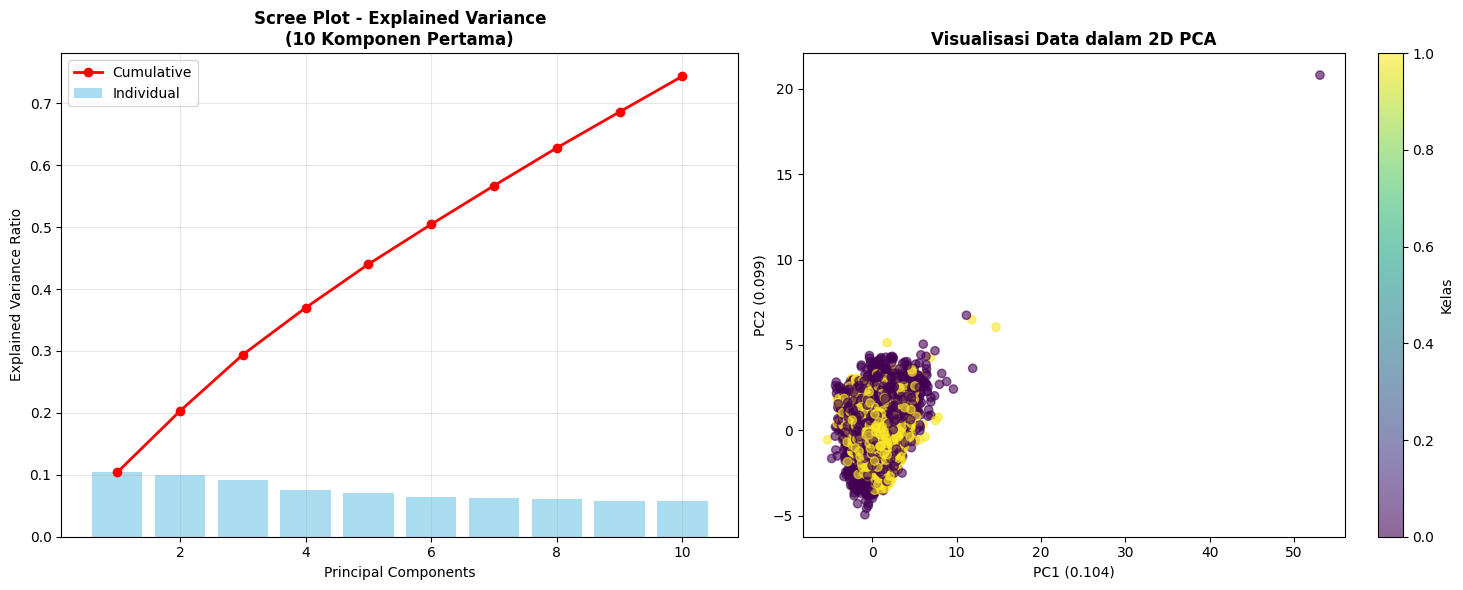

 PCA berhasil dilakukan!
   • Total variance explained oleh 2 PC: 0.203
   • Dimensi reduced dari 16 ke 2 features


In [ ]:

# Standardisasi data sebelum PCA
print(" STANDARDISASI DATA...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

# Melakukan PCA
print("MELAKUKAN ANALISIS PCA...")
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

# Analisis explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(" EXPLAINED VARIANCE PCA:")
for i, (var, cum_var) in enumerate(zip(explained_variance[:10], cumulative_variance[:10])):
    print(f"   PC-{i+1}: {var:.3f} ({cum_var:.3f} cumulative)")

# Visualisasi explained variance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scree plot
components = range(1, len(explained_variance) + 1)
axes[0].bar(components[:10], explained_variance[:10], alpha=0.7, color='skyblue', label='Individual')
axes[0].plot(components[:10], cumulative_variance[:10], 'ro-', linewidth=2, markersize=6, label='Cumulative')
axes[0].set_xlabel('Principal Components')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Scree Plot - Explained Variance\n(10 Komponen Pertama)', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Pilih 2 komponen utama untuk visualisasi
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Visualisasi data dalam 2D PCA
scatter = axes[1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_encoded, cmap='viridis', alpha=0.6)
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.3f})')
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.3f})')
axes[1].set_title('Visualisasi Data dalam 2D PCA', fontweight='bold')
plt.colorbar(scatter, ax=axes[1], label='Kelas')

plt.tight_layout()
plt.show()

print(f" PCA berhasil dilakukan!")
print(f"   • Total variance explained oleh 2 PC: {cumulative_variance[1]:.3f}")
print(f"   • Dimensi reduced dari {X_processed.shape[1]} ke 2 features")

## **VISUALISASI DENGAN LDA**

Memvisualisasikan data dengan teknik supervised dimensionality reduction.

**Perbedaan PCA vs LDA:**
- **PCA**: Maximize variance (unsupervised)
- **LDA**: Maximize class separation (supervised)

**Analisis LDA:**
1. **Class Separation**: Mengukur seberapa baik kelas terpisah
2. **Feature Discrimination**: Memahami kemampuan fitur membedakan kelas
3. **1D Projection**: Visualisasi dalam 1 dimensi untuk clarity

**Business Insight:**
- Memahami seberapa "separable" kelas dalam feature space
- Identifikasi potensi accuracy ceiling

 MELAKUKAN ANALISIS LDA...
 HASIL LDA:
   • Explained variance ratio: 1.000
   • Shape transformed data: (45211, 1)


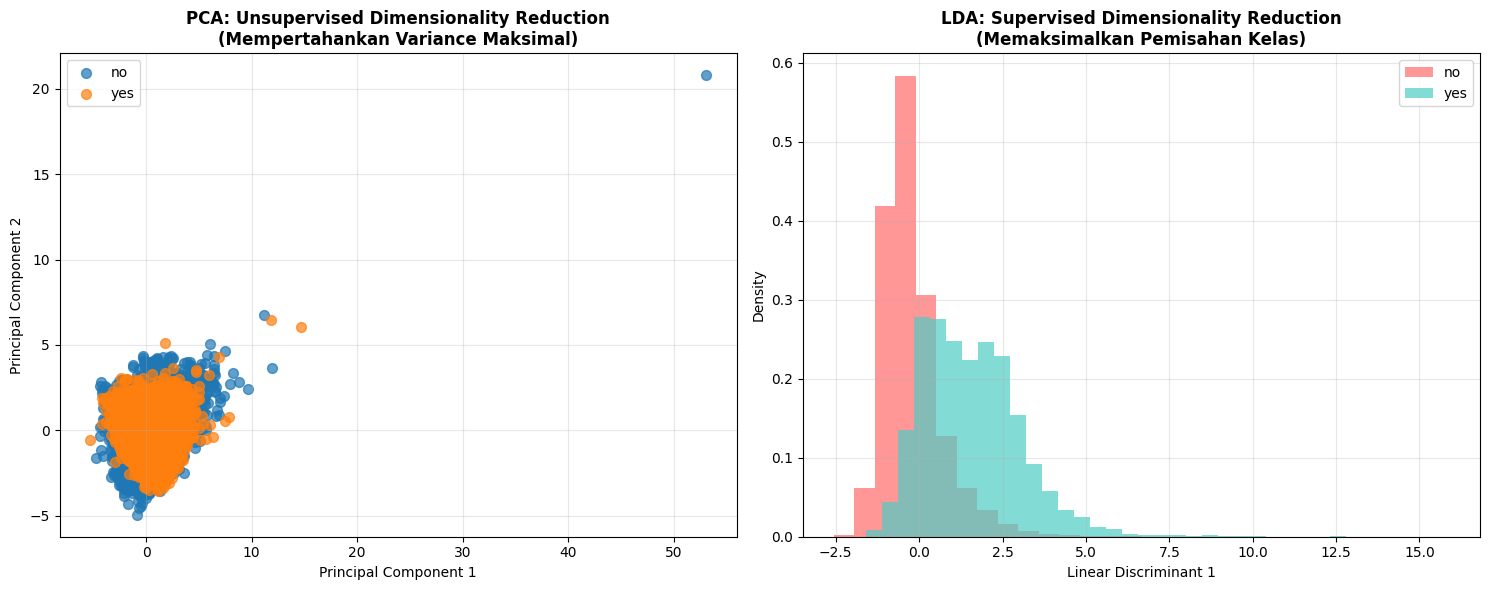

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Melakukan LDA
print(" MELAKUKAN ANALISIS LDA...")
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y_encoded)

print(" HASIL LDA:")
print(f"   • Explained variance ratio: {lda.explained_variance_ratio_[0]:.3f}")
print(f"   • Shape transformed data: {X_lda.shape}")

# Visualisasi perbandingan PCA vs LDA
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# PCA Visualization
for target_class in np.unique(y_encoded):
    class_mask = y_encoded == target_class
    class_name = target_encoder.inverse_transform([target_class])[0]
    axes[0].scatter(X_pca_2d[class_mask, 0], X_pca_2d[class_mask, 1],
                   label=class_name, alpha=0.7, s=50)
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].set_title('PCA: Unsupervised Dimensionality Reduction\n(Mempertahankan Variance Maksimal)', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# LDA Visualization
colors = ['#FF6B6B', '#4ECDC4']
for i, target_class in enumerate(np.unique(y_encoded)):
    class_mask = y_encoded == target_class
    class_name = target_encoder.inverse_transform([target_class])[0]
    axes[1].hist(X_lda[class_mask], bins=30, alpha=0.7, color=colors[i],
                label=class_name, density=True)
axes[1].set_xlabel('Linear Discriminant 1')
axes[1].set_ylabel('Density')
axes[1].set_title('LDA: Supervised Dimensionality Reduction\n(Memaksimalkan Pemisahan Kelas)', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### **PERBANDINGAN PCA vs LDA**

   • PCA: Unsupervised - mencari arah variance terbesar

   • LDA: Supervised - mencari arah pemisahan kelas terbaik

   • PCA: Mempertahankan struktur data global

   • LDA: Fokus pada pemisahan antar kelas

## **MEMAHAMI DECISION TREE TUNGGAL**

**Tujuan:**
Memahami dasar-dasar Decision Tree sebagai building block Random Forest.

**Konsep Decision Tree:**
- **Tree Structure**: Root node → decision nodes → leaf nodes
- **Splitting Criteria**: Gini impurity atau entropy
- **Recursive Partitioning**: Membagi data recursively sampai stopping criteria

**Visualisasi Tree:**
- Memahami bagaimana model membuat keputusan
- Interpretasi feature importance
- Identifikasi overfitting potential

**Limitation:**
- High variance
- Sensitive to small data changes
- Prone to overfitting


KONSEP DECISION TREE:
• Struktur pohon dengan nodes dan leaves
• Setiap node: decision berdasarkan feature terbaik  
• Metrics: Gini Impurity atau Entropy
• Proses: Recursive partitioning



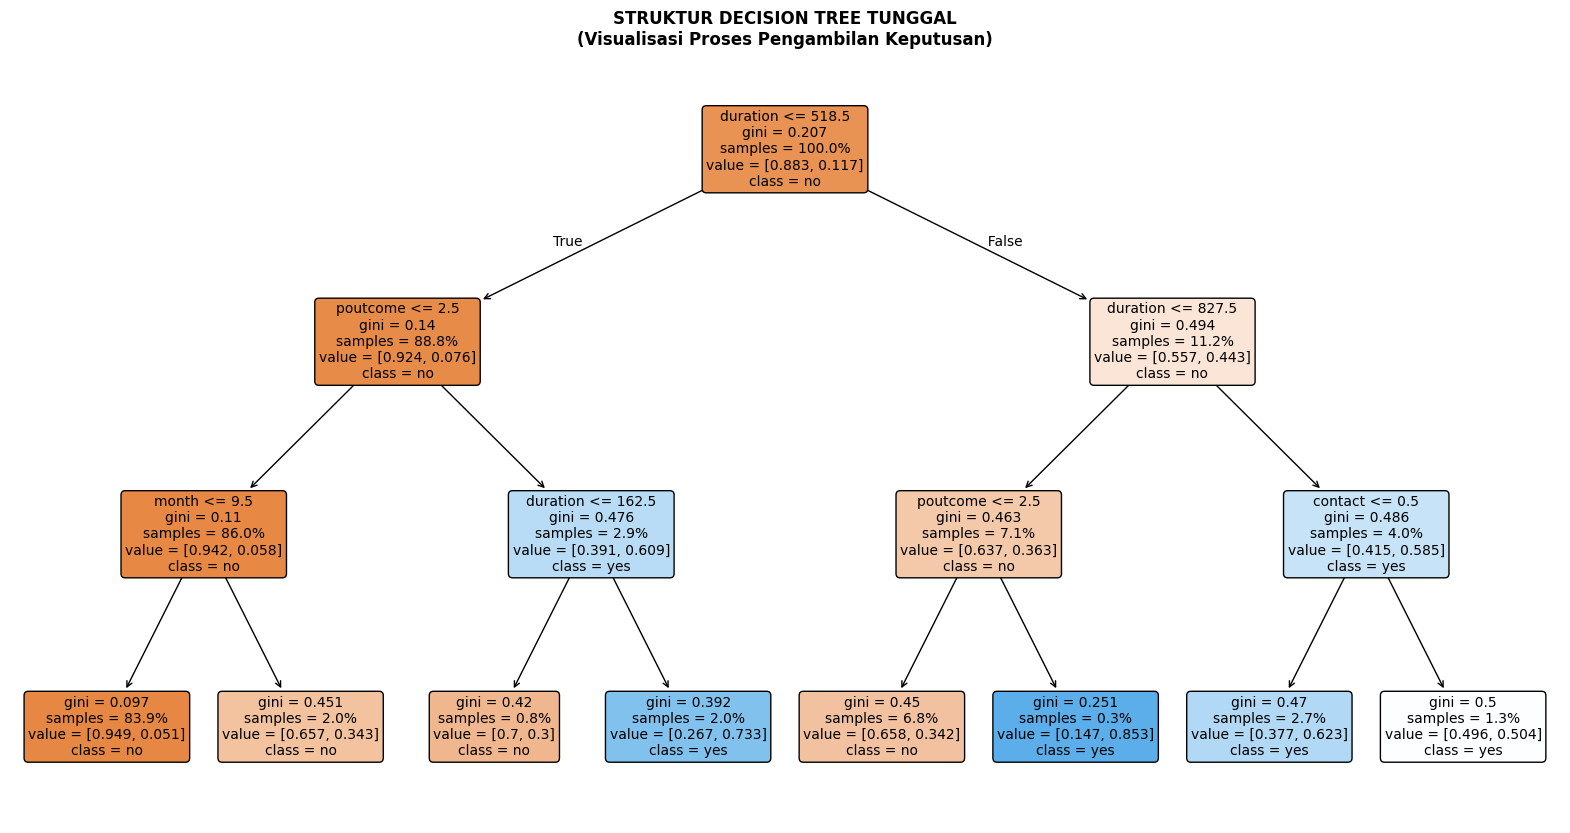

FEATURE IMPORTANCE - SINGLE TREE:
  feature  importance
 duration    0.589504
 poutcome    0.342744
    month    0.063101
  contact    0.004651
      age    0.000000
      job    0.000000
  marital    0.000000
education    0.000000

 EVALUASI SINGLE DECISION TREE:
   • Accuracy: 0.9009
   • Kedalaman tree: 3
   • Jumlah leaf nodes: 8
   • Fitur paling penting: duration


In [ ]:
print("""
KONSEP DECISION TREE:
• Struktur pohon dengan nodes dan leaves
• Setiap node: decision berdasarkan feature terbaik
• Metrics: Gini Impurity atau Entropy
• Proses: Recursive partitioning
""")

# Train single Decision Tree untuk interpretability
simple_tree = DecisionTreeClassifier(
    max_depth=3,           # Limit depth untuk interpretability
    min_samples_split=100, # Minimal samples untuk split
    min_samples_leaf=50,   # Minimal samples di leaf
    random_state=42
)

simple_tree.fit(X_train, y_train)

# Visualisasi Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(simple_tree,
          feature_names=X_processed.columns,
          class_names=target_encoder.classes_,
          filled=True,
          rounded=True,
          fontsize=10,
          proportion=True)
plt.title('STRUKTUR DECISION TREE TUNGGAL\n(Visualisasi Proses Pengambilan Keputusan)', fontweight='bold')
plt.show()

# Feature importance analysis
tree_importance = pd.DataFrame({
    'feature': X_processed.columns,
    'importance': simple_tree.feature_importances_
}).sort_values('importance', ascending=False)

print("FEATURE IMPORTANCE - SINGLE TREE:")
print(tree_importance.head(8).to_string(index=False))

# Evaluasi single tree
y_pred_tree = simple_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print(f"\n EVALUASI SINGLE DECISION TREE:")
print(f"   • Accuracy: {accuracy_tree:.4f}")
print(f"   • Kedalaman tree: {simple_tree.get_depth()}")
print(f"   • Jumlah leaf nodes: {simple_tree.get_n_leaves()}")
print(f"   • Fitur paling penting: {tree_importance.iloc[0]['feature']}")

## **MEMBANGUN RANDOM FOREST**
Membangun ensemble model yang mengatasi limitation Decision Tree tunggal.

**Ensemble Mechanism:**
1. **Bagging (Bootstrap Aggregating)**:
   - Setiap tree dilatih pada random subset data
   - Reduce variance melalui averaging

2. **Feature Randomness**:
   - Setiap split mempertimbangkan subset fitur
   - Increase diversity among trees

**Hyperparameters Tuning:**
- `n_estimators`: Jumlah tree dalam forest
- `max_depth`: Membatasi kompleksitas individual tree
- `max_features`: Mengontrol feature randomness

**Expected Benefits:**
- Reduced overfitting
- Improved generalization
- Better feature importance estimates


KONSEP RANDOM FOREST:
• Ensemble Method: Menggabungkan banyak Decision Tree
• Dua Jenis Randomness:
  1. BAGGING: Setiap tree dilatih pada bootstrap sample
  2. FEATURE RANDOMNESS: Subset features per split
• Final Prediction: Voting dari semua tree

🔧 PARAMETER RANDOM FOREST:
   • n_estimators: 100 trees
   • max_features: sqrt
   • bootstrap: True
   • max_depth: 10

 TRAINING RANDOM FOREST...
 RANDOM FOREST TRAINING SELESAI!
   • Jumlah tree: 100
   • Rata-rata kedalaman: 10.0
   • Rata-rata leaf nodes: 491.7

 TOP 10 FEATURE IMPORTANCE - RANDOM FOREST:
 feature  importance
duration    0.395291
 housing    0.171512
 contact    0.076597
   month    0.055444
    loan    0.053346
   pdays    0.050106
     job    0.032305
campaign    0.031608
poutcome    0.028386
previous    0.023240


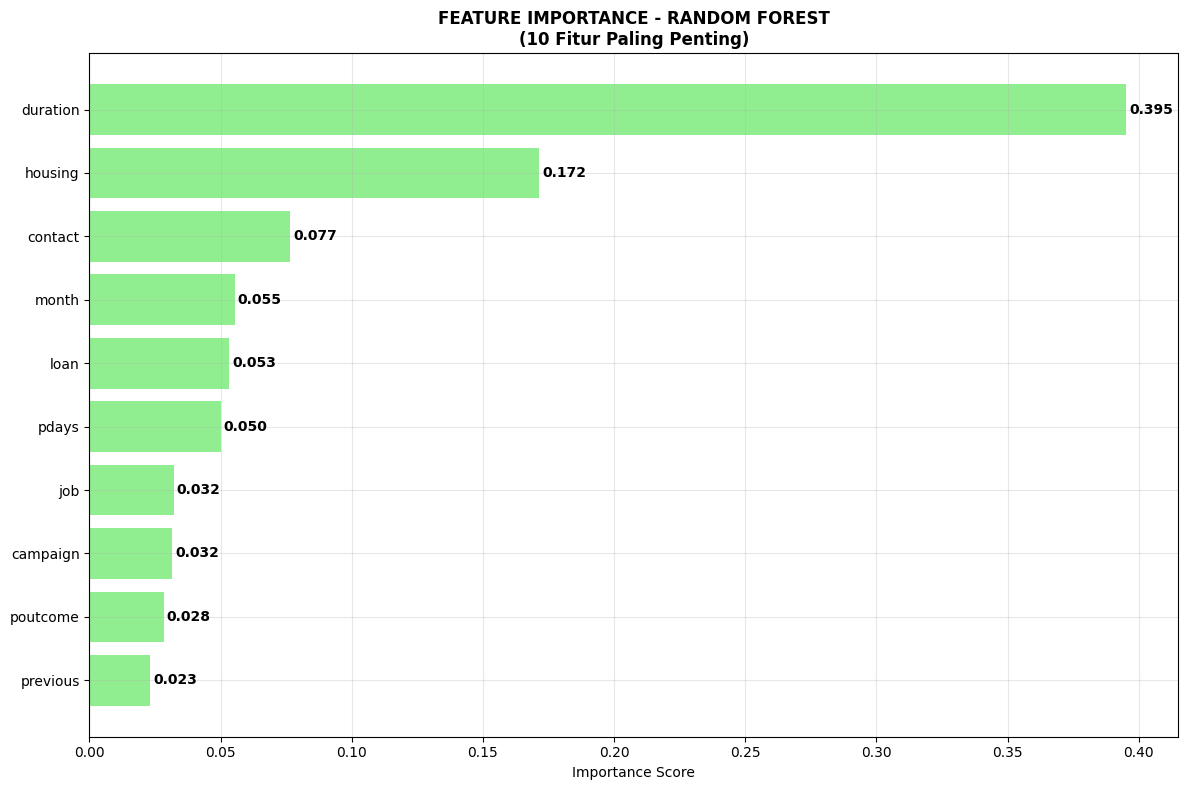

In [ ]:
print("""
KONSEP RANDOM FOREST:
• Ensemble Method: Menggabungkan banyak Decision Tree
• Dua Jenis Randomness:
  1. BAGGING: Setiap tree dilatih pada bootstrap sample
  2. FEATURE RANDOMNESS: Subset features per split
• Final Prediction: Voting dari semua tree
""")

# Membangun Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,           # Jumlah tree dalam forest
    max_depth=10,               # Membatasi kedalaman tiap tree
    min_samples_split=5,        # Minimal samples untuk split
    min_samples_leaf=2,         # Minimal samples di leaf
    max_features='sqrt',        # Feature randomness
    bootstrap=True,             # Menggunakan bagging
    random_state=42,
    n_jobs=-1                  # Parallel processing
)

print("🔧 PARAMETER RANDOM FOREST:")
print(f"   • n_estimators: {rf_model.n_estimators} trees")
print(f"   • max_features: {rf_model.max_features}")
print(f"   • bootstrap: {rf_model.bootstrap}")
print(f"   • max_depth: {rf_model.max_depth}")

# Training Random Forest
print("\n TRAINING RANDOM FOREST...")
rf_model.fit(X_train_smote, y_train_smote)

print(" RANDOM FOREST TRAINING SELESAI!")
print(f"   • Jumlah tree: {len(rf_model.estimators_)}")
print(f"   • Rata-rata kedalaman: {np.mean([tree.get_depth() for tree in rf_model.estimators_]):.1f}")
print(f"   • Rata-rata leaf nodes: {np.mean([tree.get_n_leaves() for tree in rf_model.estimators_]):.1f}")

# Feature Importance dari Random Forest
feature_importance_rf = pd.DataFrame({
    'feature': X_processed.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n TOP 10 FEATURE IMPORTANCE - RANDOM FOREST:")
print(feature_importance_rf.head(10).to_string(index=False))

# Visualisasi Feature Importance
plt.figure(figsize=(12, 8))
top_features = feature_importance_rf.head(10)
plt.barh(top_features['feature'], top_features['importance'], color='lightgreen')
plt.xlabel('Importance Score')
plt.title('FEATURE IMPORTANCE - RANDOM FOREST\n(10 Fitur Paling Penting)', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)

# Tambahkan nilai importance pada bar
for i, (feature, importance) in enumerate(zip(top_features['feature'], top_features['importance'])):
    plt.text(importance + 0.001, i, f'{importance:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## **EVALUASI RANDOM FOREST**

**Tujuan:**
Mengevaluasi performance Random Forest secara komprehensif.

**Evaluation Metrics:**
1. **Accuracy**: Overall correctness
2. **AUC-ROC**: Discrimination capability
3. **Confusion Matrix**: Detailed error analysis
4. **Feature Importance**: Business insight extraction

**Analysis Components:**
- Performance pada test set (unseen data)
- Error pattern analysis
- Business interpretation of results

**Key Questions Answered:**
- How well does the model generalize?
- What types of errors does it make?
- Which features are most predictive?

 HASIL EVALUASI RANDOM FOREST:
   • Accuracy: 0.8482
   • AUC-ROC: 0.8945
   • Jumlah Tree: 100

 LAPORAN KLASIFIKASI DETAIL - RANDOM FOREST:
              precision    recall  f1-score   support

          no       0.96      0.86      0.91     11977
         yes       0.42      0.74      0.53      1587

    accuracy                           0.85     13564
   macro avg       0.69      0.80      0.72     13564
weighted avg       0.90      0.85      0.87     13564



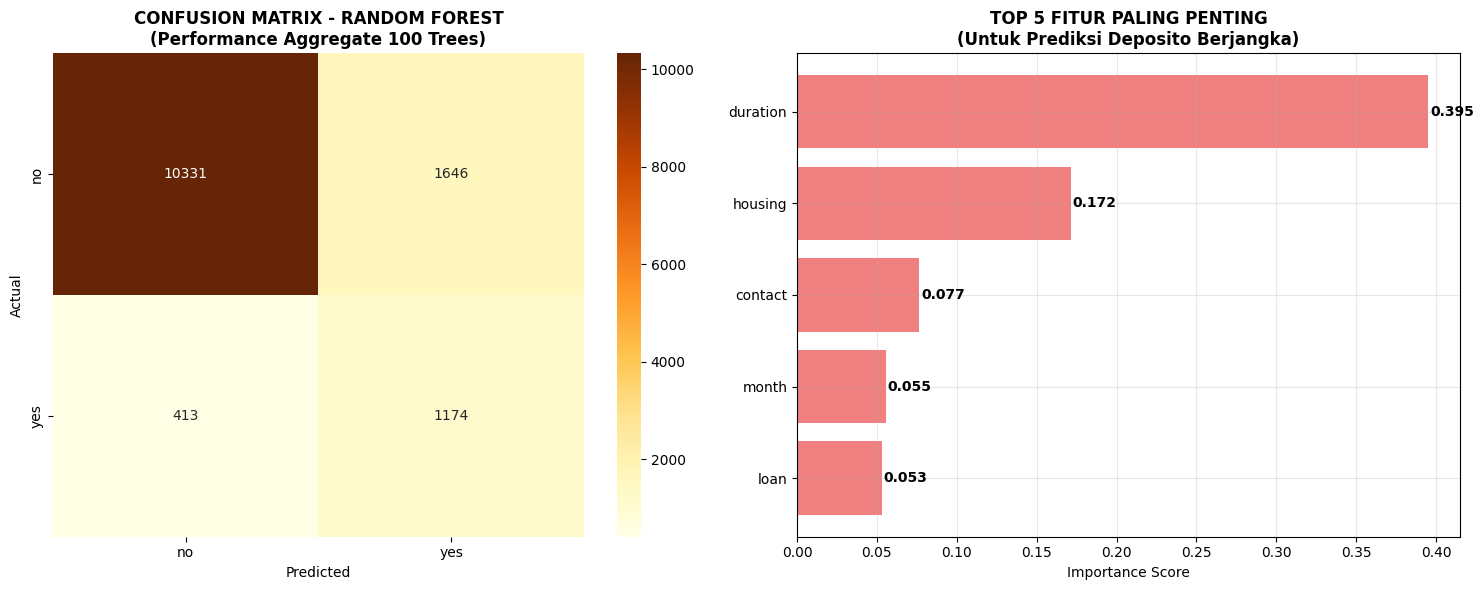

 Evaluasi Random Forest selesai!


In [ ]:
# Prediksi dan evaluasi Random Forest
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(" HASIL EVALUASI RANDOM FOREST:")
print(f"   • Accuracy: {accuracy_rf:.4f}")
print(f"   • AUC-ROC: {auc_rf:.4f}")
print(f"   • Jumlah Tree: {rf_model.n_estimators}")

print("\n LAPORAN KLASIFIKASI DETAIL - RANDOM FOREST:")
print(classification_report(y_test, y_pred_rf, target_names=target_encoder.classes_))

# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlOrBr', ax=axes[0],
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
axes[0].set_title('CONFUSION MATRIX - RANDOM FOREST\n(Performance Aggregate 100 Trees)', fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Feature Importance Top 5
top_5_features = feature_importance_rf.head(5)
axes[1].barh(top_5_features['feature'], top_5_features['importance'], color='lightcoral')
axes[1].set_xlabel('Importance Score')
axes[1].set_title('TOP 5 FITUR PALING PENTING\n(Untuk Prediksi Deposito Berjangka)', fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3)

# Tambahkan nilai importance
for i, (feature, importance) in enumerate(zip(top_5_features['feature'], top_5_features['importance'])):
    axes[1].text(importance + 0.001, i, f'{importance:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(" Evaluasi Random Forest selesai!")

## **IMPLEMENTASI K-NEAREST NEIGHBORS**

**Tujuan:**
Mengimplementasikan model simple baseline untuk perbandingan.

**KNN Characteristics:**
- **Instance-based Learning**: Tidak ada explicit training phase
- **Distance-based**: Menggunakan similarity measure (Euclidean)
- **Lazy Learner**: Computation dilakukan saat prediction

**Advantages:**
- Simple dan intuitive
- No assumptions tentang data distribution
- Naturally handles multi-class problems

**Disadvantages:**
- Computationally expensive untuk large datasets
- Sensitive to feature scaling
- Curse of dimensionality


KONSEP K-NEAREST NEIGHBORS:
• Instance-based Learning (Lazy Learner)
• Klasifikasi berdasarkan 'k' tetangga terdekat
• Menggunakan Distance Metrics (Euclidean)
• Tidak ada fase training eksplisit

 HASIL EVALUASI KNN:
   • Accuracy: 0.7702
   • AUC-ROC: 0.7525
   • Jumlah Tetangga (k): 5

 LAPORAN KLASIFIKASI - KNN:
              precision    recall  f1-score   support

          no       0.94      0.79      0.86     11977
         yes       0.28      0.62      0.39      1587

    accuracy                           0.77     13564
   macro avg       0.61      0.71      0.62     13564
weighted avg       0.86      0.77      0.80     13564



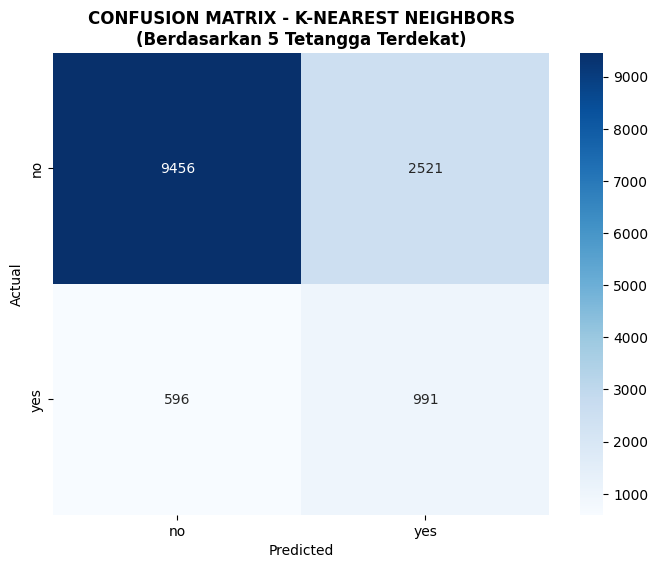

 Implementasi KNN selesai!


In [ ]:
print("""
KONSEP K-NEAREST NEIGHBORS:
• Instance-based Learning (Lazy Learner)
• Klasifikasi berdasarkan 'k' tetangga terdekat
• Menggunakan Distance Metrics (Euclidean)
• Tidak ada fase training eksplisit
""")

# Model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)

y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

print(" HASIL EVALUASI KNN:")
print(f"   • Accuracy: {accuracy_knn:.4f}")
print(f"   • AUC-ROC: {auc_knn:.4f}")
print(f"   • Jumlah Tetangga (k): {knn_model.n_neighbors}")

print("\n LAPORAN KLASIFIKASI - KNN:")
print(classification_report(y_test, y_pred_knn, target_names=target_encoder.classes_))

# Confusion Matrix KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title('CONFUSION MATRIX - K-NEAREST NEIGHBORS\n(Berdasarkan 5 Tetangga Terdekat)', fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(" Implementasi KNN selesai!")

## **IMPLEMENTASI NAIVE BAYES**

**Tujuan:**
Mengimplementasikan model probabilistic yang efisien.

**Naive Bayes Foundation:**
- **Bayes Theorem**: P(A|B) = P(B|A) * P(A) / P(B)
- **Conditional Independence**: Asumsi semua feature independent
- **Probabilistic Classification**: Output probabilities bukan hard labels

**Strengths:**
- Sangat fast training dan prediction
- Works well dengan high-dimensional data
- Robust to irrelevant features

**Weaknesses:**
- Naive independence assumption often violated
- Can produce poor probability estimates


KONSEP NAIVE BAYES:
• Berdasarkan Teorema Bayes
• Asumsi: Semua Feature Independen (Naive Assumption)
• Probabilistic Classifier
• Sangat Cepat dan Efisien

 HASIL EVALUASI NAIVE BAYES:
   • Accuracy: 0.6826
   • AUC-ROC: 0.7754

 LAPORAN KLASIFIKASI - NAIVE BAYES:
              precision    recall  f1-score   support

          no       0.96      0.67      0.79     11977
         yes       0.24      0.76      0.36      1587

    accuracy                           0.68     13564
   macro avg       0.60      0.72      0.57     13564
weighted avg       0.87      0.68      0.74     13564



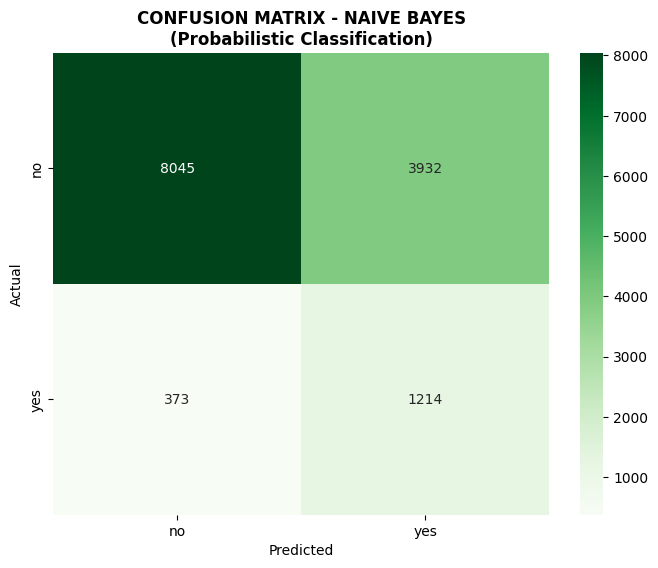

 Implementasi Naive Bayes selesai!


In [ ]:
print("""
KONSEP NAIVE BAYES:
• Berdasarkan Teorema Bayes
• Asumsi: Semua Feature Independen (Naive Assumption)
• Probabilistic Classifier
• Sangat Cepat dan Efisien
""")

# Model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)

y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

accuracy_nb = accuracy_score(y_test, y_pred_nb)
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

print(" HASIL EVALUASI NAIVE BAYES:")
print(f"   • Accuracy: {accuracy_nb:.4f}")
print(f"   • AUC-ROC: {auc_nb:.4f}")

print("\n LAPORAN KLASIFIKASI - NAIVE BAYES:")
print(classification_report(y_test, y_pred_nb, target_names=target_encoder.classes_))

# Confusion Matrix Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title('CONFUSION MATRIX - NAIVE BAYES\n(Probabilistic Classification)', fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(" Implementasi Naive Bayes selesai!")

## **PERBANDINGAN KOMPREHENSIF SEMUA MODEL**

**Tujuan:**
Membandingkan performance semua model secara fair dan comprehensive.

**Comparison Dimensions:**
1. **Accuracy**: Overall predictive performance
2. **AUC-ROC**: Discrimination capability
3. **Training Time**: Computational efficiency
4. **Interpretability**: Model transparency
5. **Robustness**: Resistance to overfitting

**Visual Comparison:**
- Side-by-side accuracy and AUC comparison
- Confusion matrix analysis untuk setiap model
- Feature importance comparison

**Selection Criteria:**
- Business requirements
- Computational constraints
- Interpretability needs

 TABEL PERBANDINGAN SEMUA MODEL:
              Model  Accuracy  AUC-ROC Training_Time Interpretability Handles_Nonlinearity Robust_to_Overfitting
      Decision Tree  0.900914 0.769717         Cepat           Tinggi                   Ya                 Tidak
      Random Forest  0.848201 0.894457 Sedang-Lambat           Sedang                   Ya                    Ya
K-Nearest Neighbors  0.770201 0.752528  Sangat Cepat           Rendah                   Ya            Tergantung
        Naive Bayes  0.682616 0.775421  Sangat Cepat           Tinggi                Tidak                    Ya


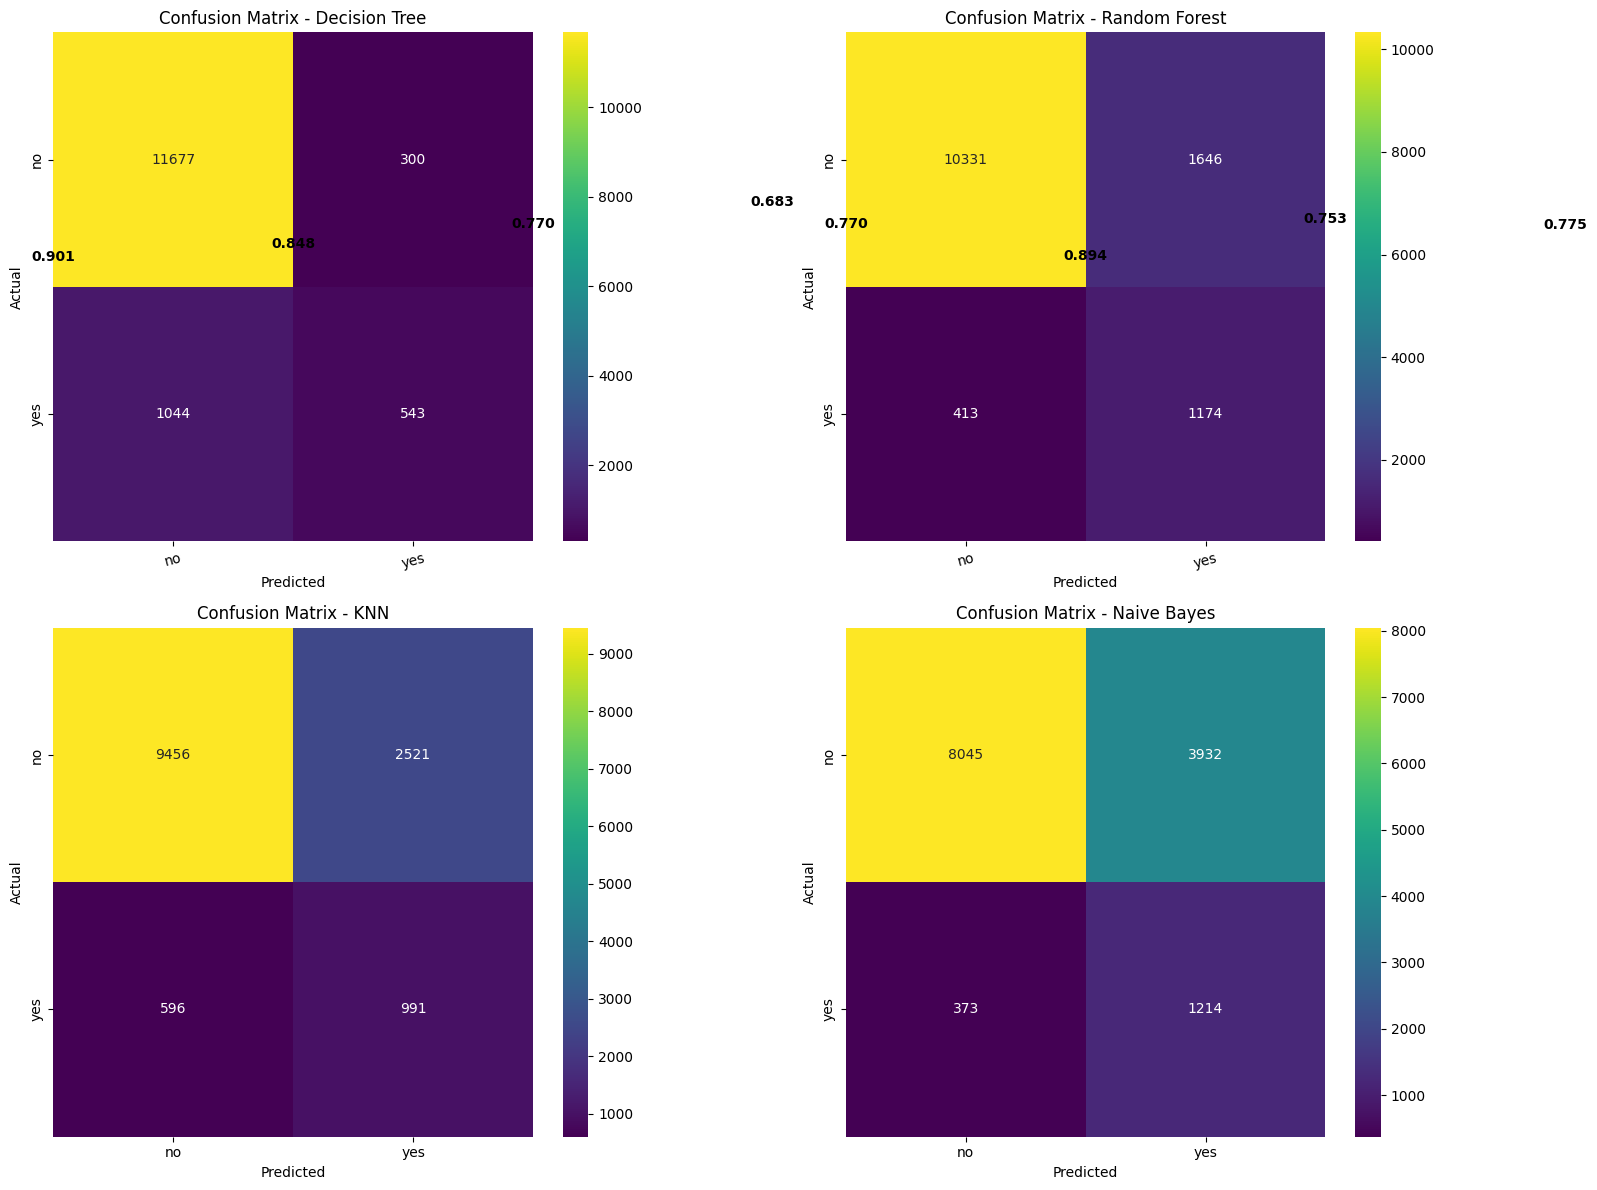

 Perbandingan semua model selesai!


In [ ]:
# Data perbandingan performa semua model
comparison_data = {
    'Model': ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes'],
    'Accuracy': [accuracy_tree, accuracy_rf, accuracy_knn, accuracy_nb],
    'AUC-ROC': [
        roc_auc_score(y_test, simple_tree.predict_proba(X_test)[:, 1]),
        auc_rf, auc_knn, auc_nb
    ],
    'Training_Time': ['Cepat', 'Sedang-Lambat', 'Sangat Cepat', 'Sangat Cepat'],
    'Interpretability': ['Tinggi', 'Sedang', 'Rendah', 'Tinggi'],
    'Handles_Nonlinearity': ['Ya', 'Ya', 'Ya', 'Tidak'],
    'Robust_to_Overfitting': ['Tidak', 'Ya', 'Tergantung', 'Ya']
}

comparison_df = pd.DataFrame(comparison_data)

print(" TABEL PERBANDINGAN SEMUA MODEL:")
print(comparison_df.to_string(index=False))

# Visualisasi perbandingan performa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Perbandingan Accuracy
models = comparison_df['Model']
accuracies = comparison_df['Accuracy']
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

bars1 = axes[0,0].bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black')
axes[0,0].set_title('PERBANDINGAN ACCURACY\n(Metrik Klasifikasi Utama)', fontweight='bold', fontsize=12)
axes[0,0].set_ylabel('Accuracy Score')
axes[0,0].set_ylim(0, 1)
axes[0,0].tick_params(axis='x', rotation=15)

# Tambahkan nilai accuracy pada bar
for bar, acc in zip(bars1, accuracies):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{acc:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Perbandingan AUC-ROC
auc_scores = comparison_df['AUC-ROC']
bars2 = axes[0,1].bar(models, auc_scores, color=colors, alpha=0.8, edgecolor='black')
axes[0,1].set_title('PERBANDINGAN AUC-ROC\n(Kemampuan Diskriminasi Model)', fontweight='bold', fontsize=12)
axes[0,1].set_ylabel('AUC-ROC Score')
axes[0,1].set_ylim(0, 1)
axes[0,1].tick_params(axis='x', rotation=15)

# Tambahkan nilai AUC-ROC pada bar
for bar, auc in zip(bars2, auc_scores):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{auc:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 3. Confusion Matrix Comparison
models_pred = [y_pred_tree, y_pred_rf, y_pred_knn, y_pred_nb]
model_names = ['Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes']

for i, (pred, name) in enumerate(zip(models_pred, model_names)):
    cm = confusion_matrix(y_test, pred)
    row, col = i // 2, i % 2 # Corrected indexing

    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', ax=axes[row, col],
                xticklabels=target_encoder.classes_,
                yticklabels=target_encoder.classes_)
    axes[row, col].set_title(f'Confusion Matrix - {name}')
    axes[row, col].set_ylabel('Actual')
    axes[row, col].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

print(" Perbandingan semua model selesai!")

## **ANALISIS DETAIL PERFORMA PER KELAS**

**Tujuan:**
Menganalisis performance model pada setiap kelas secara terpisah.

**Class-wise Metrics:**
1. **Precision**: Accuracy of positive predictions
2. **Recall**: Coverage of actual positives
3. **F1-Score**: Harmonic mean of precision and recall

**Business Interpretation:**
- **High Precision**: Few false positives (cost saving)
- **High Recall**: Few false negatives (opportunity capture)
- **F1-Score**: Balanced view of both

**Trade-off Analysis:**
- Precision-Recall trade-off untuk setiap model
- Class-specific performance patterns
- Business cost considerations

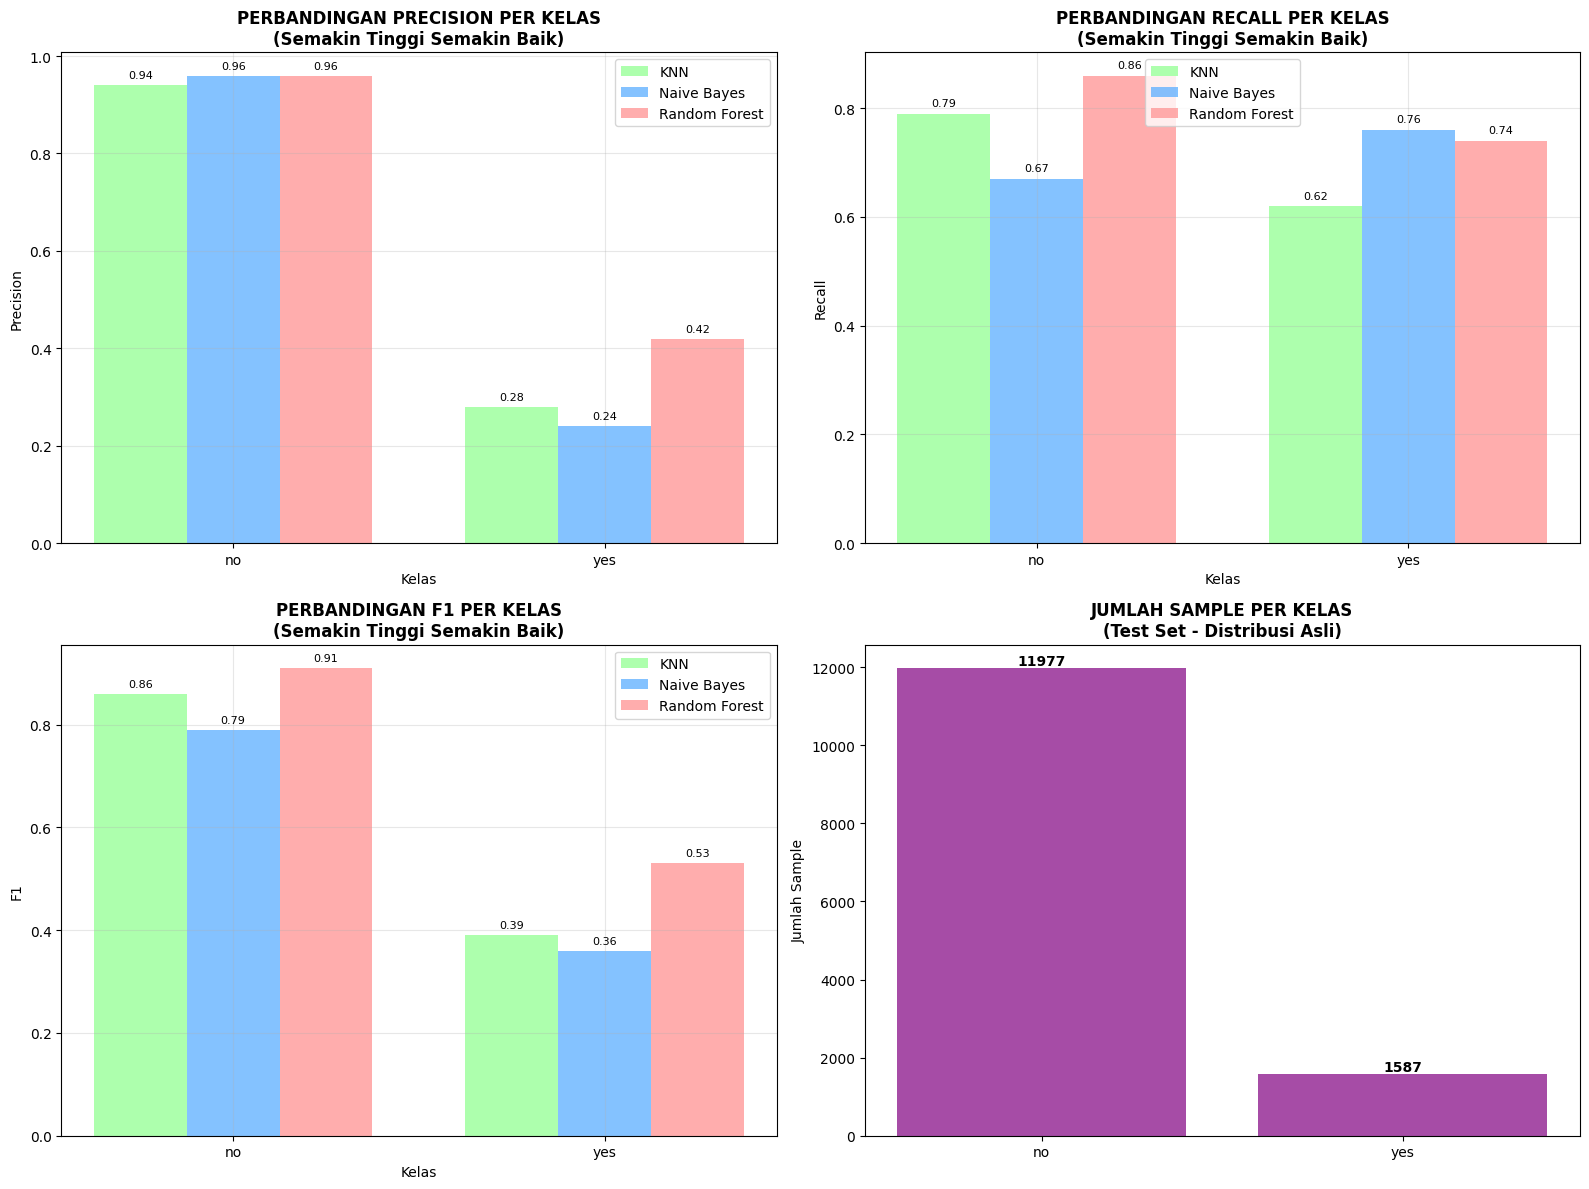

 RINGKASAN PERFORMA PER KELAS:

 KELAS: no
   • KNN:      Precision=0.940, Recall=0.790
   • Naive Bayes: Precision=0.960, Recall=0.670
   • Random Forest: Precision=0.960, Recall=0.860

 KELAS: yes
   • KNN:      Precision=0.280, Recall=0.620
   • Naive Bayes: Precision=0.240, Recall=0.760
   • Random Forest: Precision=0.420, Recall=0.740


In [ ]:
# Fungsi untuk ekstrak metrik detail dari classification report
def extract_detailed_metrics(report_str):
    lines = report_str.split('\n')
    metrics = {}
    for line in lines[2:-3]:
        if line.strip():
            parts = line.split()
            if len(parts) >= 5:
                class_name = ' '.join(parts[:-4])
                precision = float(parts[-4])
                recall = float(parts[-3])
                f1 = float(parts[-2])
                support = int(parts[-1])
                metrics[class_name] = {
                    'precision': precision,
                    'recall': recall,
                    'f1': f1,
                    'support': support
                }
    return metrics

# Ekstrak metrik untuk semua model
knn_report = classification_report(y_test, y_pred_knn, target_names=target_encoder.classes_)
nb_report = classification_report(y_test, y_pred_nb, target_names=target_encoder.classes_)
rf_report = classification_report(y_test, y_pred_rf, target_names=target_encoder.classes_)

knn_metrics = extract_detailed_metrics(knn_report)
nb_metrics = extract_detailed_metrics(nb_report)
rf_metrics = extract_detailed_metrics(rf_report)

# Visualisasi metrik per kelas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
metrics_to_plot = ['precision', 'recall', 'f1']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx//2, idx%2]

    models = ['KNN', 'Naive Bayes', 'Random Forest']
    classes = list(knn_metrics.keys())

    x = np.arange(len(classes))
    width = 0.25

    # Data untuk plotting
    knn_values = [knn_metrics[cls][metric] for cls in classes]
    nb_values = [nb_metrics[cls][metric] for cls in classes]
    rf_values = [rf_metrics[cls][metric] for cls in classes]

    ax.bar(x - width, knn_values, width, label='KNN', color='#99FF99', alpha=0.8)
    ax.bar(x, nb_values, width, label='Naive Bayes', color='#66B3FF', alpha=0.8)
    ax.bar(x + width, rf_values, width, label='Random Forest', color='#FF9999', alpha=0.8)

    ax.set_xlabel('Kelas')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f'PERBANDINGAN {metric.upper()} PER KELAS\n(Semakin Tinggi Semakin Baik)', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.legend()
    ax.grid(True, alpha=0.3)

    # Tambahkan nilai pada bar
    for i, (knn_val, nb_val, rf_val) in enumerate(zip(knn_values, nb_values, rf_values)):
        ax.text(i - width, knn_val + 0.01, f'{knn_val:.2f}', ha='center', va='bottom', fontsize=8)
        ax.text(i, nb_val + 0.01, f'{nb_val:.2f}', ha='center', va='bottom', fontsize=8)
        ax.text(i + width, rf_val + 0.01, f'{rf_val:.2f}', ha='center', va='bottom', fontsize=8)

# Support information
ax = axes[1, 1]
supports = [knn_metrics[cls]['support'] for cls in classes]
bars = ax.bar(classes, supports, color='purple', alpha=0.7)
ax.set_title('JUMLAH SAMPLE PER KELAS\n(Test Set - Distribusi Asli)', fontweight='bold')
ax.set_ylabel('Jumlah Sample')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{height}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(" RINGKASAN PERFORMA PER KELAS:")
for kelas in classes:
    print(f"\n KELAS: {kelas}")
    print(f"   • KNN:      Precision={knn_metrics[kelas]['precision']:.3f}, Recall={knn_metrics[kelas]['recall']:.3f}")
    print(f"   • Naive Bayes: Precision={nb_metrics[kelas]['precision']:.3f}, Recall={nb_metrics[kelas]['recall']:.3f}")
    print(f"   • Random Forest: Precision={rf_metrics[kelas]['precision']:.3f}, Recall={rf_metrics[kelas]['recall']:.3f}")

## **KESIMPULAN DAN REKOMENDASI**

**Tujuan:**
Menyimpulkan findings dan memberikan actionable recommendations.

**Key Findings:**
1. **Best Performing Model**: Identifikasi model terbaik
2. **Feature Insights**: Business intelligence dari feature importance
3. **Performance Characteristics**: Strength dan weakness setiap model

**Actionable Recommendations:**
1. **Model Selection**: Model mana yang digunakan untuk production
2. **Feature Focus**: Fitur mana yang paling predictive
3. **Next Steps**: Roadmap untuk improvement

**Implementation Guidance:**
- Deployment considerations
- Monitoring recommendations
- Improvement opportunities

In [ ]:
# Menentukan model terbaik
best_model_idx = np.argmax([accuracy_rf, accuracy_knn, accuracy_nb])
best_models = ['Random Forest', 'K-Nearest Neighbors', 'Naive Bayes']
best_model = best_models[best_model_idx]
best_accuracy = max(accuracy_rf, accuracy_knn, accuracy_nb)

print(f" MODEL TERBAIK: {best_model}")
print(f"   • Accuracy: {best_accuracy:.4f}")
print(f"   • AUC-ROC: {max(auc_rf, auc_knn, auc_nb):.4f}")

print(f"\n RINGKASAN PEMAHAMAN YANG DIPEROLEH:")

print("\n1. DECISION TREE TUNGGAL:")
print("   • Kelebihan: Sangat interpretable, mudah dipahami")
print("   • Kekurangan: Overfitting, high variance, unstable")
print("   • Accuracy: {:.4f}".format(accuracy_tree))

print("\n2.  RANDOM FOREST:")
print("   • Solusi Ensemble: Bagging + Feature Randomness")
print("   • Keunggulan: Reduced variance, robust, feature importance")
print("   • Accuracy: {:.4f}".format(accuracy_rf))

print("\n3.  K-NEAREST NEIGHBORS:")
print("   • Konsep: Instance-based, tetangga terdekat")
print("   • Keunggulan: Simple, no training phase")
print("   • Accuracy: {:.4f}".format(accuracy_knn))

print("\n4.  NAIVE BAYES:")
print("   • Konsep: Probabilistic, naive independence assumption")
print("   • Keunggulan: Sangat cepat, efisien")
print("   • Accuracy: {:.4f}".format(accuracy_nb))

print(f"\n INSIGHT BISNIS UNTUK BANK MARKETING:")
print("Berdasarkan Feature Importance Random Forest:")
top_3 = feature_importance_rf.head(3)
for i, (_, row) in enumerate(top_3.iterrows(), 1):
    print(f"   {i}. {row['feature']} (importance: {row['importance']:.3f})")

print(f"\n REKOMENDASI IMPLEMENTASI PRODUCTION:")
print("1.  Gunakan Random Forest untuk model production")
print("2.  Lakukan hyperparameter tuning lebih lanjut")
print("3.  Monitor feature importance secara berkala")
print("4.  Implementasi A/B testing untuk validasi bisnis")
print("5.  Pertimbangkan business cost dari false positive/negative")

print(f"\n PENGEMBANGAN SELANJUTNYA:")
print("• Eksperimen dengan Gradient Boosting (XGBoost, LightGBM)")
print("•  Deep Learning untuk pattern yang lebih kompleks")
print("•  Feature engineering berdasarkan domain knowledge perbankan")
print("•  AutoML untuk otomatisasi model selection")

print(f"\n" + "="*70)
print(" ANALISIS KOMPREHENSIF SELESAI!")
print("="*70)

 MODEL TERBAIK: Random Forest
   • Accuracy: 0.8482
   • AUC-ROC: 0.8945

 RINGKASAN PEMAHAMAN YANG DIPEROLEH:

1. DECISION TREE TUNGGAL:
   • Kelebihan: Sangat interpretable, mudah dipahami
   • Kekurangan: Overfitting, high variance, unstable
   • Accuracy: 0.9009

2.  RANDOM FOREST:
   • Solusi Ensemble: Bagging + Feature Randomness
   • Keunggulan: Reduced variance, robust, feature importance
   • Accuracy: 0.8482

3.  K-NEAREST NEIGHBORS:
   • Konsep: Instance-based, tetangga terdekat
   • Keunggulan: Simple, no training phase
   • Accuracy: 0.7702

4.  NAIVE BAYES:
   • Konsep: Probabilistic, naive independence assumption
   • Keunggulan: Sangat cepat, efisien
   • Accuracy: 0.6826

 INSIGHT BISNIS UNTUK BANK MARKETING:
Berdasarkan Feature Importance Random Forest:
   1. duration (importance: 0.395)
   2. housing (importance: 0.172)
   3. contact (importance: 0.077)

 REKOMENDASI IMPLEMENTASI PRODUCTION:
1.  Gunakan Random Forest untuk model production
2.  Lakukan hyperparameter 

## **EXECUTIVE SUMMARY**

**Tujuan:**
Menyajikan summary high-level untuk stakeholder management.

**Content Structure:**
1. **Project Overview**: Scope dan objectives
2. **Key Results**: Performance metrics dan insights
3. **Business Impact**: Implications untuk business
4. **Recommendations**: Actionable next steps

**Audience:**
- Executive management
- Business stakeholders
- Project sponsors

**Value Proposition:**
- Concise summary of technical analysis
- Business-focused insights
- Clear implementation roadmap

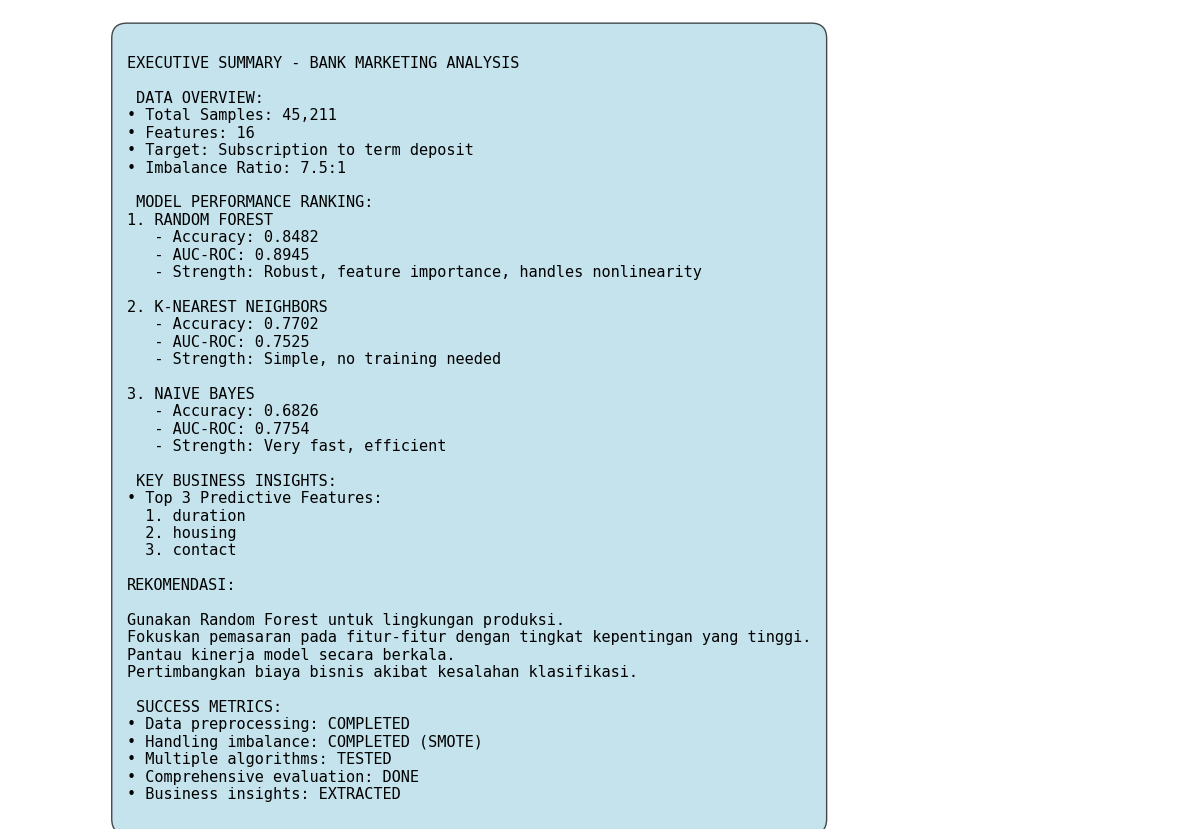

 ANALISIS BANK MARKETING TELAH BERHASIL DISELESAIKAN!
 Semua tahapan dari preprocessing hingga evaluasi model telah dilakukan!
 Siap untuk implementasi di production environment!


In [ ]:


# Buat summary dashboard
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

summary_text = f"""
EXECUTIVE SUMMARY - BANK MARKETING ANALYSIS

 DATA OVERVIEW:
• Total Samples: {X.shape[0]:,}
• Features: {X.shape[1]}
• Target: Subscription to term deposit
• Imbalance Ratio: {rasio_ketidakseimbangan:.1f}:1

 MODEL PERFORMANCE RANKING:
1. RANDOM FOREST
   - Accuracy: {accuracy_rf:.4f}
   - AUC-ROC: {auc_rf:.4f}
   - Strength: Robust, feature importance, handles nonlinearity

2. K-NEAREST NEIGHBORS
   - Accuracy: {accuracy_knn:.4f}
   - AUC-ROC: {auc_knn:.4f}
   - Strength: Simple, no training needed

3. NAIVE BAYES
   - Accuracy: {accuracy_nb:.4f}
   - AUC-ROC: {auc_nb:.4f}
   - Strength: Very fast, efficient

 KEY BUSINESS INSIGHTS:
• Top 3 Predictive Features:
  1. {feature_importance_rf.iloc[0]['feature']}
  2. {feature_importance_rf.iloc[1]['feature']}
  3. {feature_importance_rf.iloc[2]['feature']}

REKOMENDASI:

Gunakan Random Forest untuk lingkungan produksi.
Fokuskan pemasaran pada fitur-fitur dengan tingkat kepentingan yang tinggi.
Pantau kinerja model secara berkala.
Pertimbangkan biaya bisnis akibat kesalahan klasifikasi.

 SUCCESS METRICS:
• Data preprocessing: COMPLETED
• Handling imbalance: COMPLETED (SMOTE)
• Multiple algorithms: TESTED
• Comprehensive evaluation: DONE
• Business insights: EXTRACTED
"""

ax.text(0.1, 0.95, summary_text, fontsize=11, family='monospace',
        verticalalignment='top', bbox=dict(boxstyle="round,pad=1.0",
        facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

print(" ANALISIS BANK MARKETING TELAH BERHASIL DISELESAIKAN!")
print(" Semua tahapan dari preprocessing hingga evaluasi model telah dilakukan!")
print(" Siap untuk implementasi di production environment!")